# **Predicting Marketing Outcomes**
### Analyzing demographic information to determine if a client will subscribe to a product offering

This project focuses on supervised learning with a classification task.

The goal is to build a model that can predict whether a bank client will accept a marketing offer based on their demographic information and previous behavior with regards to the bank's marketing campaigns. This model is important because it helps the bank determine how to spend their resources to maximize their return. We want to make sure that we can accurately determine whether a client might accept an offer to determine where to focus our time and resources.

## Setup

In [1037]:
# install packages
import sys
! {sys.executable} -m pip install pandas
! {sys.executable} -m pip install seaborn
! {sys.executable} -m pip install statsmodels
! {sys.executable} -m pip install scikit-learn
! {sys.executable} -m pip install xgboost
! {sys.executable} -m pip install imbalanced-learn

# import packages
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# import the classifiers we'll use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# import tools for training, testing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, precision_recall_curve, average_precision_score, auc, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV


# **Data**

This dataset is from a bank in Portugal and is from a public source (UC Irvine Machine Learning Repository). It contains factors surrounding direct marketing to clients with the target being a binary outcome: whether or not the client subscribes to a specific product (term deposit).

**Citation:** Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

The data has **20 features**, **1 target**, and **41,188 samples**.\
The data file is large with a size of **6.6+ MB**.

In [1013]:
# our data uses ; as delimiter
df = pd.read_csv('data/bank-additional-full.csv', delimiter=";")

In [1014]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [1015]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### **Features**

Here are the features as they are in the incoming dataset. I will perform cleaning and EDA to improve the quality of the data.

| Feature | Data Type | Description |
| :--- | :--- | :--- |
| age | Integer | Age of sample client |
| job | Categorical | Occupation type of sample client<br/>`["admin","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"]` |
| marital | Categorical | `["married","divorced","single"]` |
| education | Categorical | Level of education attained by the client <br/>`["unknown","illiterate","basic.6y","basic.4y", "professional.course", "basic.9y", "high.school", "university.degree"]`|
| default | Binary | `["yes","no"]`<br/>***yes*** if sample has **credit in default**, otherwise ***no***. |
| housing | Binary | `["yes","no"]`<br/>***yes*** if sample has a **housing loan**, otherwise ***no***. |
| loan | Binary | `["yes","no"]`<br/>***yes*** if sample has a **personal loan**, otherwise ***no***. |
| contact | Categorical | Last type of contact made with sample in current campaign<br/>`["unknown","telephone","cellular"]` |
| month | Categorical | Last month of contact made with sample in current campaign<br/>`["jan", ... , "dec"]` |
| day_of_week | Categorical | Last weekday of week contact was made with sample in current campaign<br/>`["mon", ... , "fri"]` |
| duration | Integer | How many seconds the last contact lasted |
| campaign | Integer | How many times was this sample contacted during current campaign |
| pdays | Integer | Number of days since client was contacted from a previous campaign (`-1` indicates no previous campaign contact) |
| previous | Integer | Number of contacts for this sample prior to this current campaign |
| poutcome | Categorical | Previous campaign outcome<br/>`["unknown","other","failure","success"]` |

# **Exploratory Data Analysis**

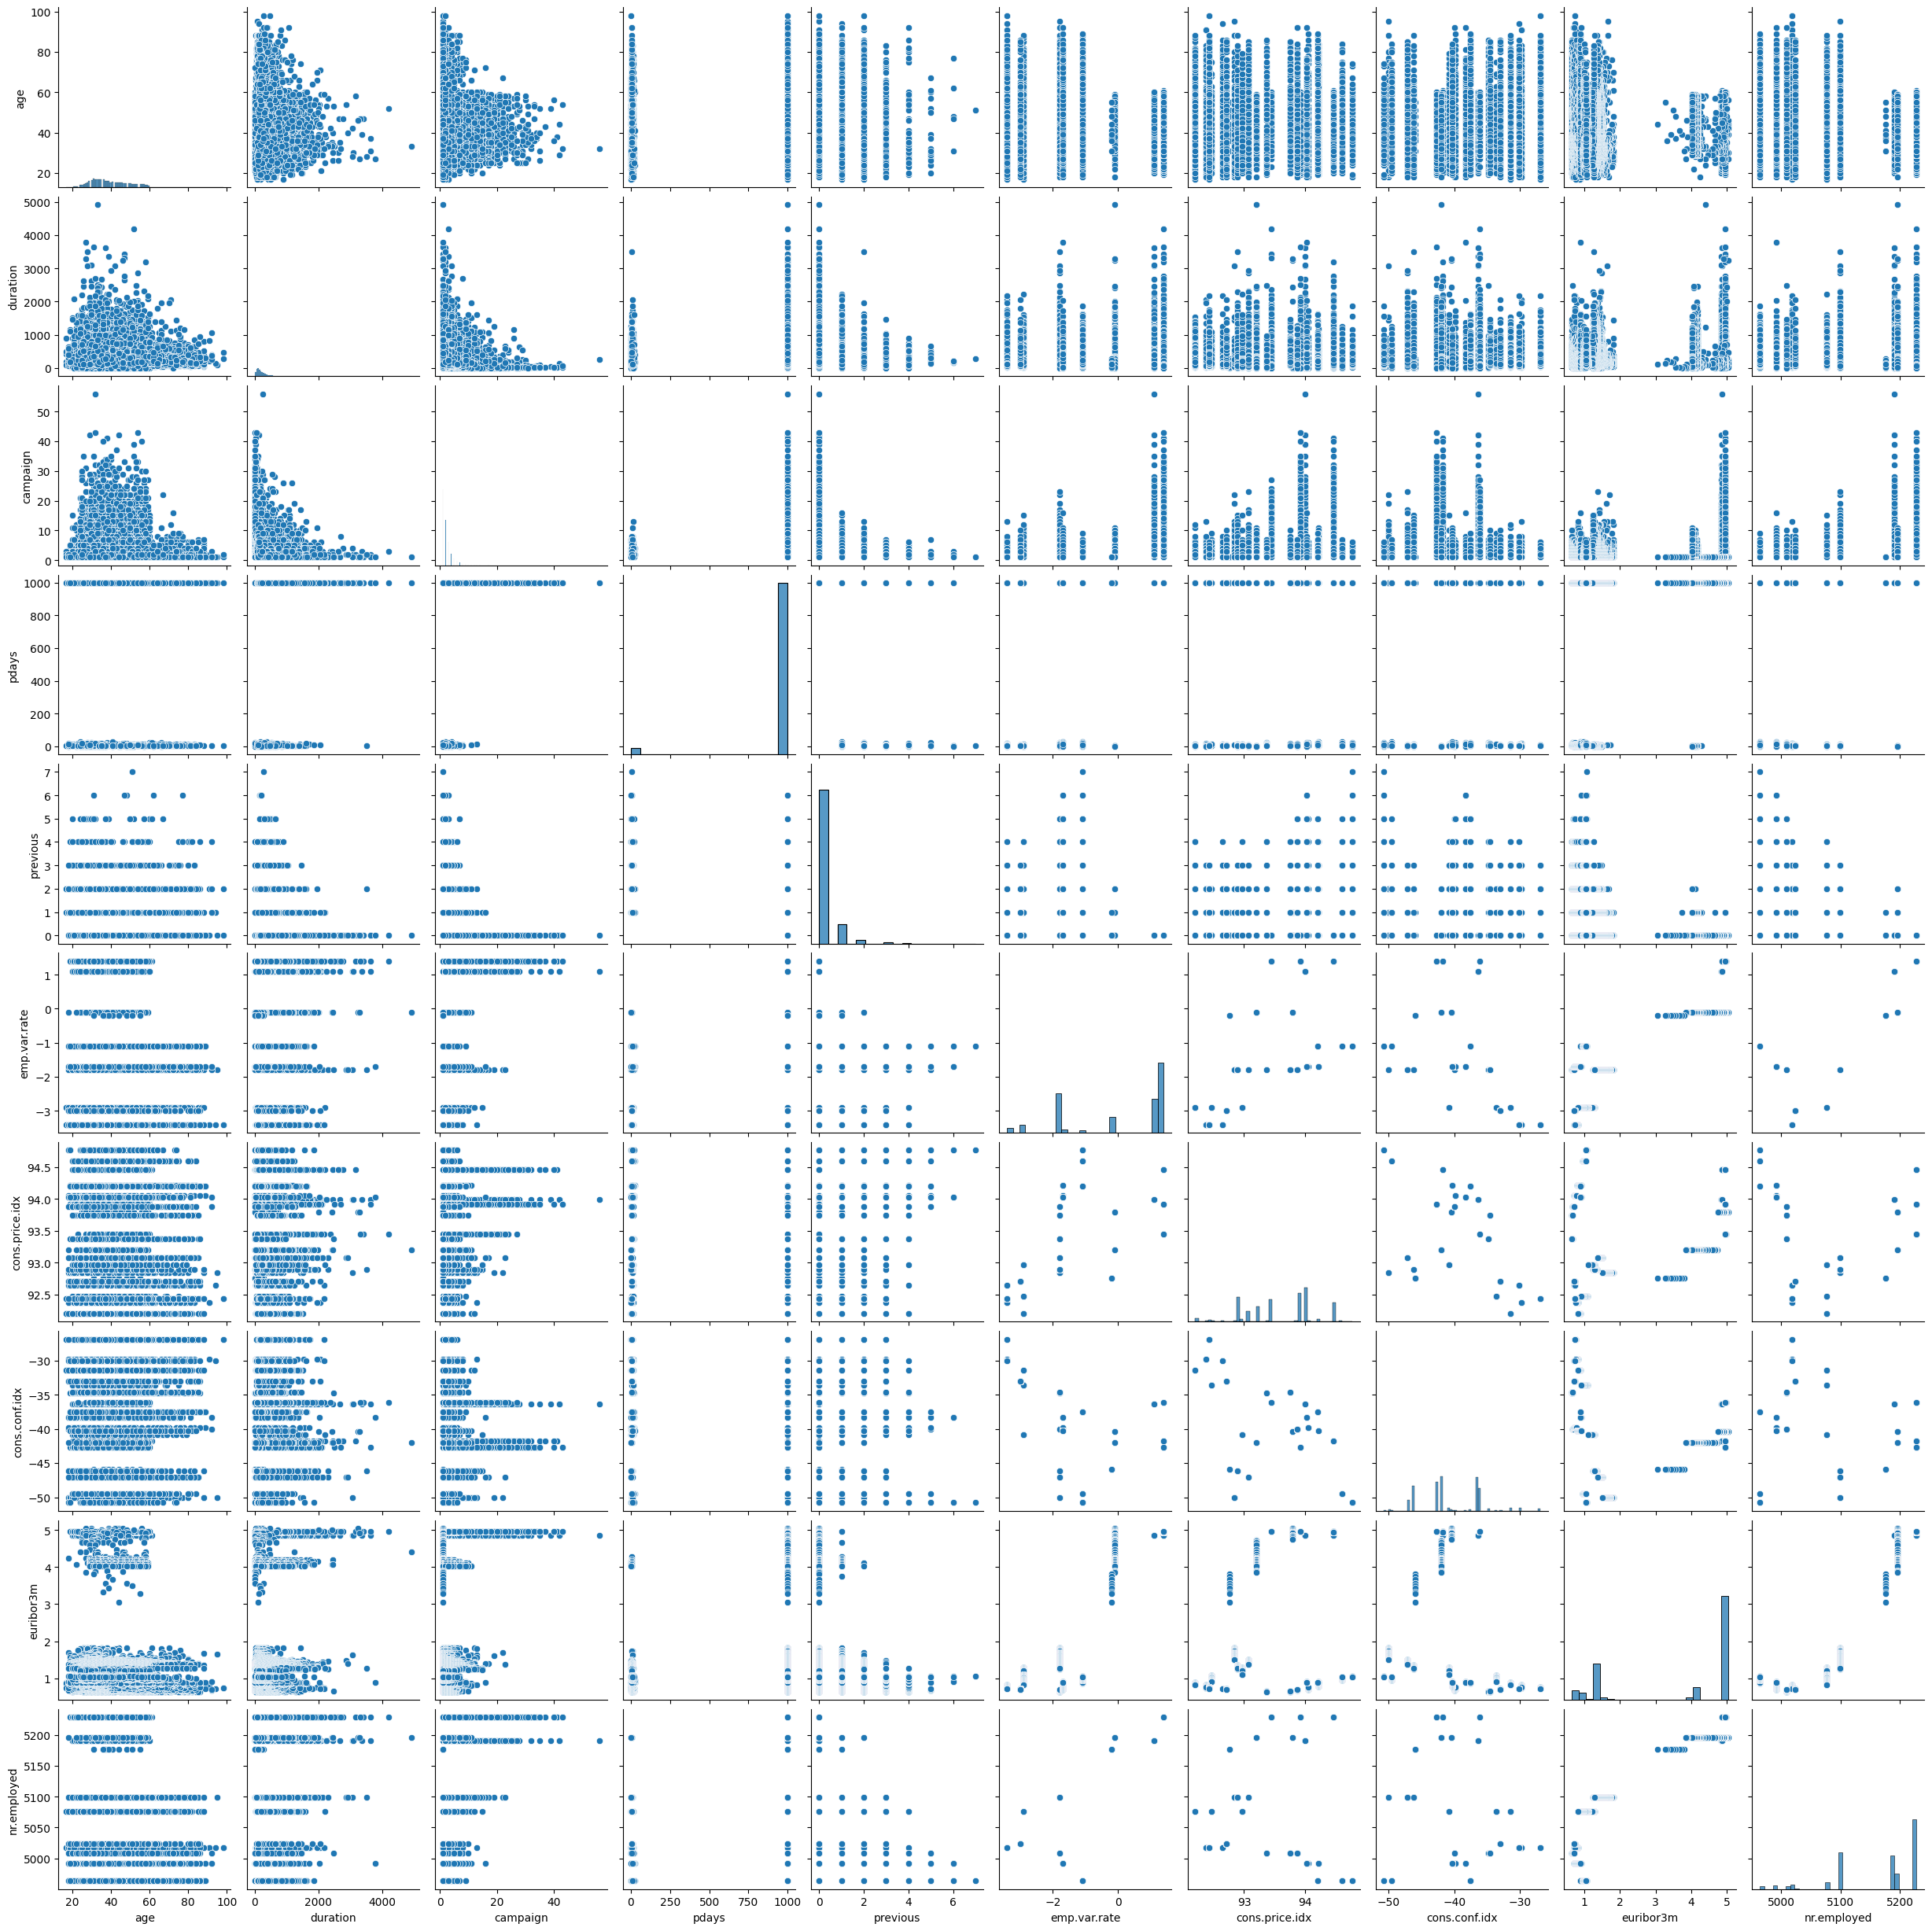

In [961]:
seaborn.pairplot(df)
plt.show()

# **Data Cleaning**
I want to make sure that I have data that is interpretable by humans and computers to be able to build a model that can make reliable predictions.

#### 1. I removed columns that are not considered factors for our purpose and have uses in other applications of the data. I also moved the target to be the first column.

In [1016]:
# Remove columns that are not the factors we are using
df_clean = df.drop(columns=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
target_column = df_clean.pop('y')
df_clean.insert(0, 'y', target_column)
print("This leaves us with the following factors and target y:")
print(df_clean.columns.tolist())


This leaves us with the following factors and target y:
['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


#### 2. I looked for all of the unique values for a given column.

In [1017]:
# Find the unique values for each column
for col in df_clean.columns:
    print(df_clean[col].value_counts())
    print("-------------------")

y
no     36548
yes     4640
Name: count, dtype: int64
-------------------
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64
-------------------
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
-------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
-------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
-------------------
def

#### 3. I removed all rows with values of `unknown` in columns because we want to focus on known values and their effects. This leaves us with 30,488 samples.

In [1018]:
# Let's remove rows that have unknown values
df_clean = df_clean[df_clean['job'] != 'unknown']
df_clean = df_clean[df_clean['marital'] != 'unknown']
df_clean = df_clean[df_clean['education'] != 'unknown']
df_clean = df_clean[df_clean['default'] != 'unknown']
df_clean = df_clean[df_clean['housing'] != 'unknown']
df_clean = df_clean[df_clean['loan'] != 'unknown']

print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            30488 non-null  object
 1   age          30488 non-null  int64 
 2   job          30488 non-null  object
 3   marital      30488 non-null  object
 4   education    30488 non-null  object
 5   default      30488 non-null  object
 6   housing      30488 non-null  object
 7   loan         30488 non-null  object
 8   contact      30488 non-null  object
 9   month        30488 non-null  object
 10  day_of_week  30488 non-null  object
 11  duration     30488 non-null  int64 
 12  campaign     30488 non-null  int64 
 13  pdays        30488 non-null  int64 
 14  previous     30488 non-null  int64 
 15  poutcome     30488 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB
None


#### 4. I then encoded values for better visualization and interpretation
* I converted binary values from `no` and `yes` to `false` and `true`.
* I converted month and day of week to numerical values.

In [1019]:
# Convert all binary values from "no" and "yes" to false and true.
df_clean['default'] = df_clean['default'].apply(lambda x: x == 'yes')
df_clean['housing'] = df_clean['housing'].apply(lambda x: x == 'yes')
df_clean['loan'] = df_clean['loan'].apply(lambda x: x == 'yes')
df_clean['y'] = df_clean['y'].apply(lambda x: x == 'yes')

# Convert month and day to numerical values
df_clean['day_of_week'] = df_clean['day_of_week'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
df_clean['month'] = df_clean['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                                           'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})


# Split the following categorical factors into seperate boolean columns
df_encoded = pd.get_dummies(df_clean, columns=['education','job','marital','contact','poutcome'])
for col in df_encoded.columns:
    print(df_encoded[col].value_counts())
    print("-------------------")

y
False    26629
True      3859
Name: count, dtype: int64
-------------------
age
31    1643
32    1555
33    1524
30    1441
34    1431
      ... 
91       2
89       2
95       1
87       1
94       1
Name: count, Length: 76, dtype: int64
-------------------
default
False    30485
True         3
Name: count, dtype: int64
-------------------
housing
True     16521
False    13967
Name: count, dtype: int64
-------------------
loan
False    25720
True      4768
Name: count, dtype: int64
-------------------
month
5     9733
7     5081
8     4673
6     3614
11    3496
4     2115
10     642
9      495
3      482
12     157
Name: count, dtype: int64
-------------------
day_of_week
4    6395
1    6279
3    6125
2    5955
5    5734
Name: count, dtype: int64
-------------------
duration
90      134
85      128
72      122
104     121
111     121
       ... 
1508      1
1220      1
1352      1
929       1
1868      1
Name: count, Length: 1441, dtype: int64
-------------------
campaign
1     1324

In [1020]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   y                              30488 non-null  bool 
 1   age                            30488 non-null  int64
 2   default                        30488 non-null  bool 
 3   housing                        30488 non-null  bool 
 4   loan                           30488 non-null  bool 
 5   month                          30488 non-null  int64
 6   day_of_week                    30488 non-null  int64
 7   duration                       30488 non-null  int64
 8   campaign                       30488 non-null  int64
 9   pdays                          30488 non-null  int64
 10  previous                       30488 non-null  int64
 11  education_basic.4y             30488 non-null  bool 
 12  education_basic.6y             30488 non-null  bool 
 13  education_basic.9y   

## **Conclusion on data cleaning**

Through the cleaning process, I removed samples with unknown data (missing values) to improve the quality of the samples in our data set. I transformed raw data into interpretable and consistent data (i.e. yes/no into boolean true/false and day_of_week into numerical representation) for use in the models. I used one-hot encoding to ensure that categorical variables were converted into a form that can be properly interpreted by the machine learning algorithms.

This process has helped me ensure that the dataset I am training and evaluating with is high quality and reliable. One difficulty of this is that I have increased the number of features that I am working with. I will work on addressing this during feature selection.

In [1021]:
# Replace df with cleaned df
df= df_encoded

### **Correlation Matrix**

<Axes: >

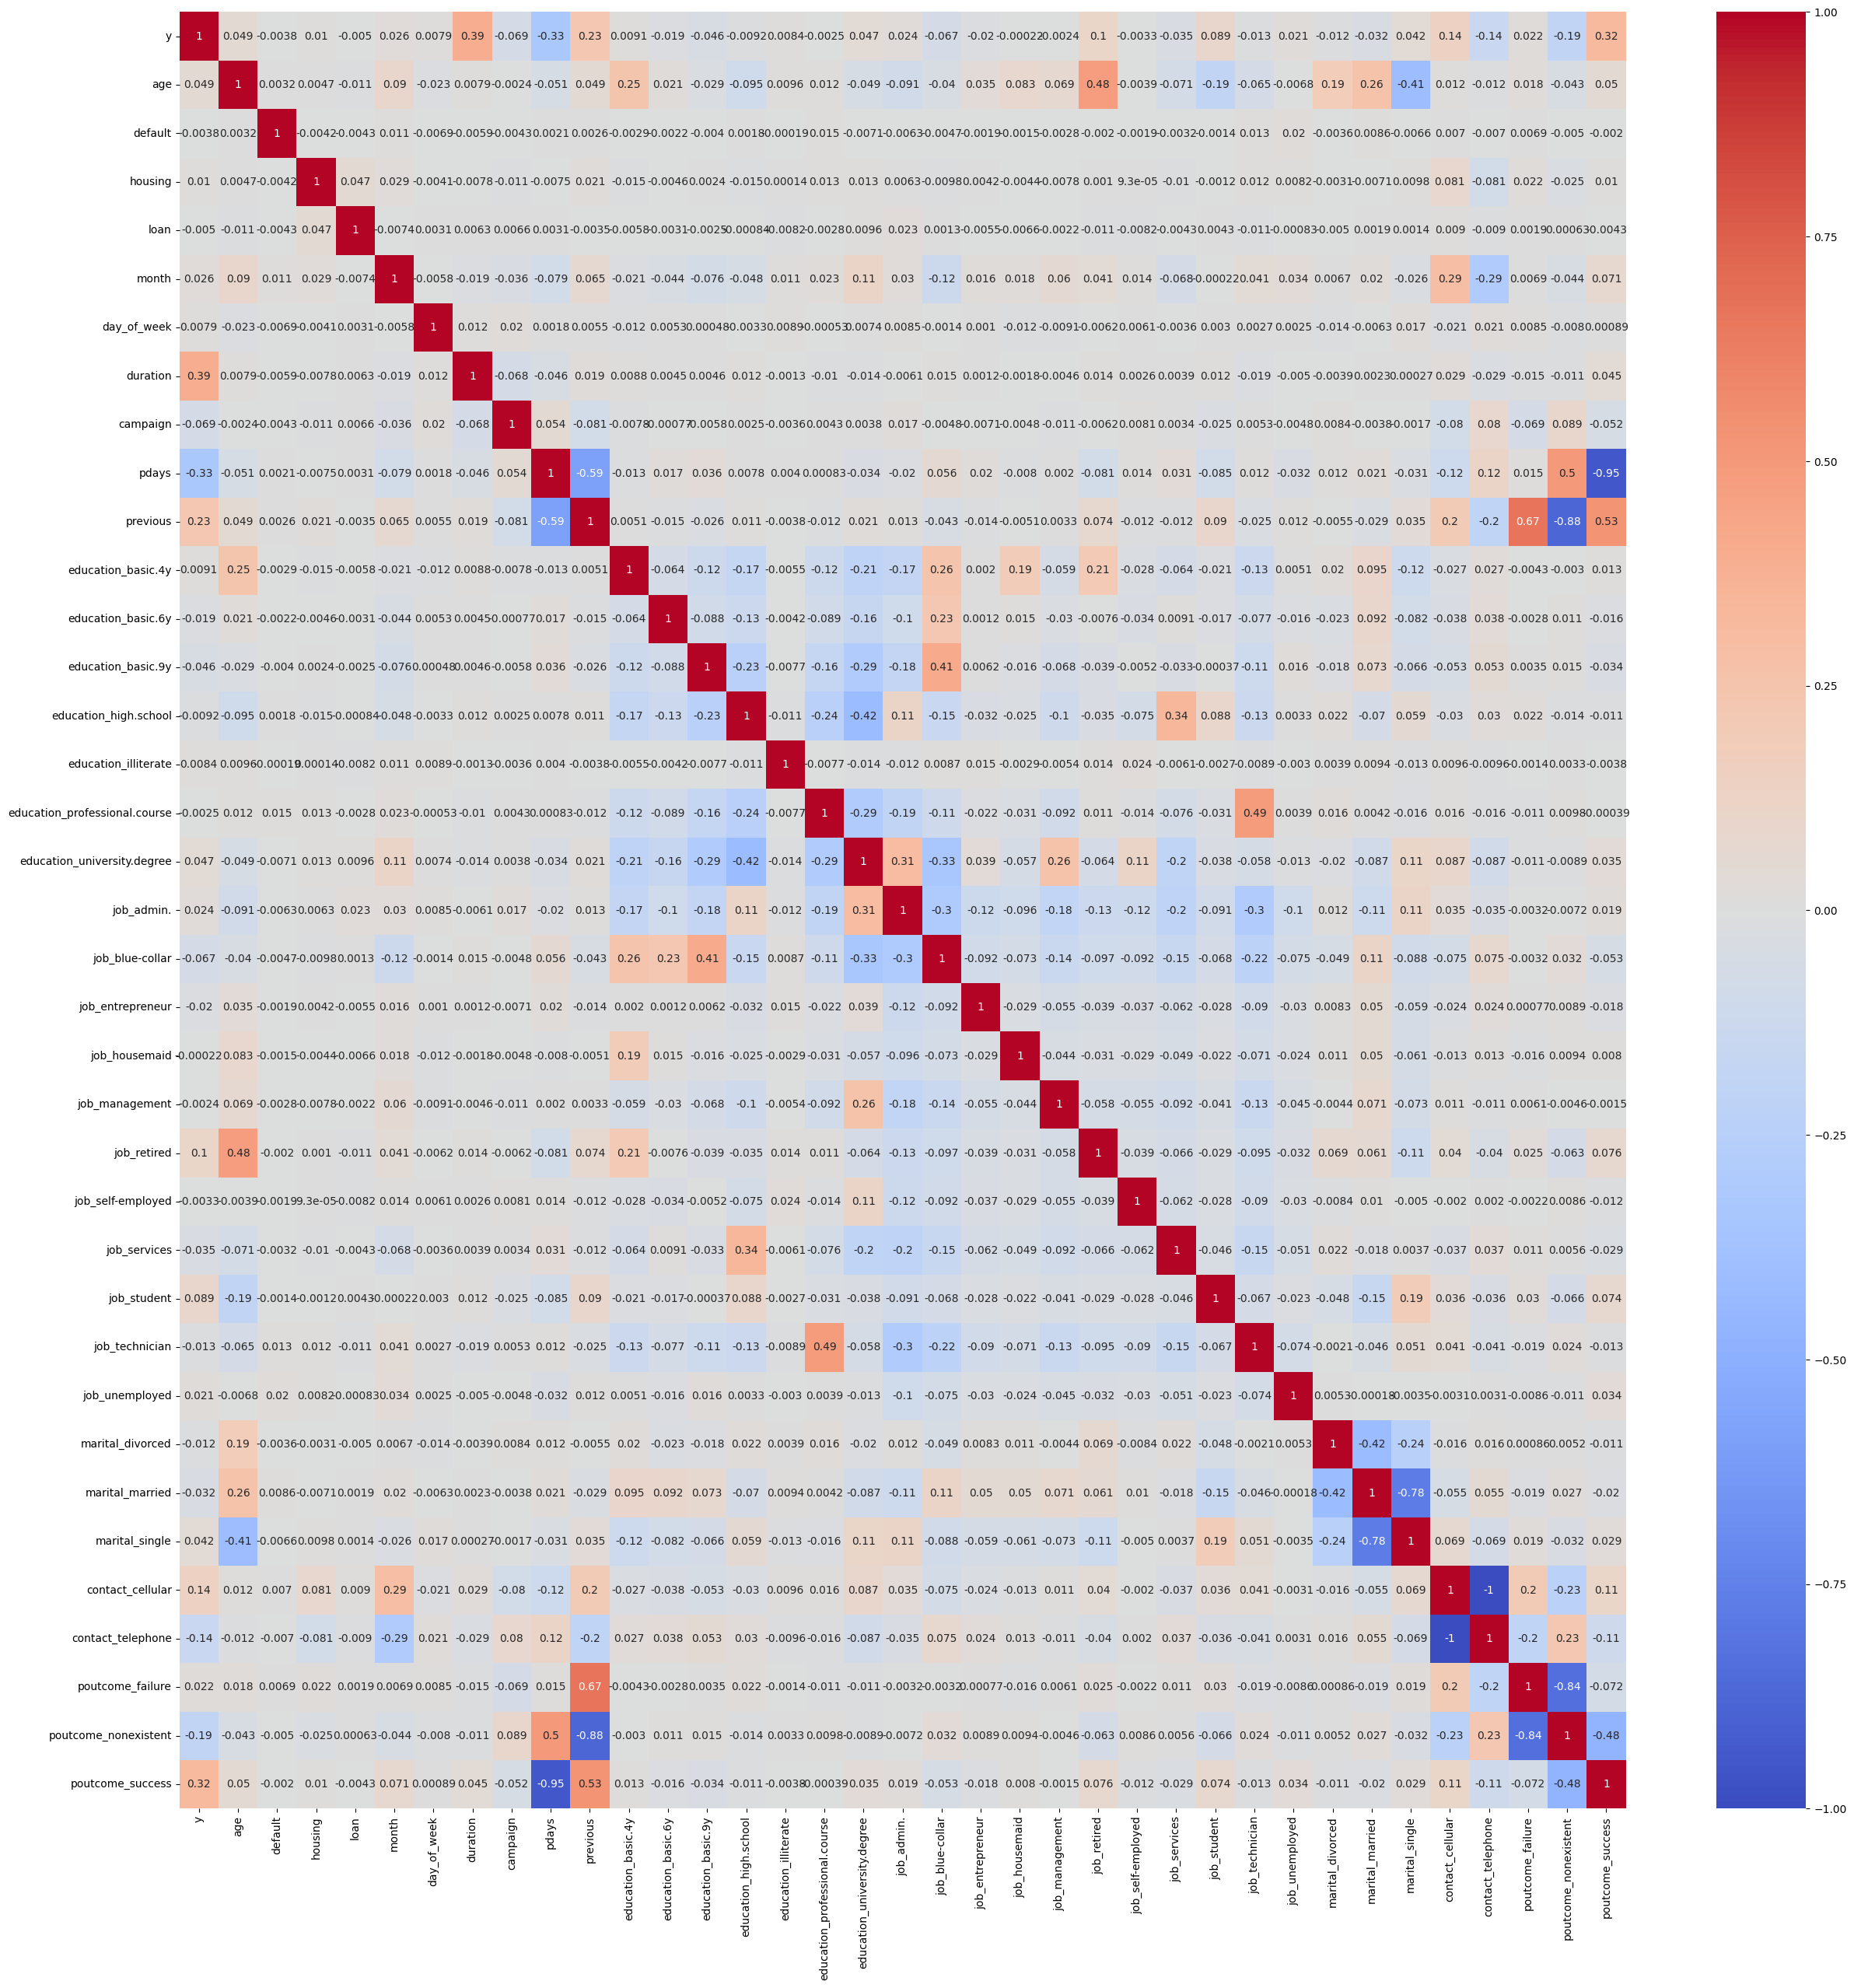

In [1003]:
plt.figure(figsize=(30, 30))
seaborn.heatmap(df.corr(), annot=True, cmap='coolwarm')

### **EDA Discussion**

The data has some interactions and instances of collinearity. Below are notable interactions between the features and outcome `y`. *(correlation coefficients are noted in parenthesis)*

* **age (0.049):** There was a slight indication that the older the client, the more likely it was that that the outcome was true.
* **duration (0.39):** This has the strongest positive correlation on the outcome suggesting that the longer the contact lasted, the more likely it was that the client would subscribe.
* **pdays (-0.33):** This has the strongest negative correlation on the outcome. The more days that had passed since the last contact, the less likely it was that the campaign was successful.
* **previous (0.23):** Repeated previous contacts suggested a more successful outcome during this campaign.
* **marital_single (0.042) & marital_married (-0.032):** Being single had a positive correlation and being married had a negative correlation.
* **education_university.degree (0.047):** From the education category, it appears that having a university degree has a positive impact on the success of the campaign.
* **job_retired (0.1) & job_student (0.089):** From the job category, these seem to have the most notable impact on the outcome (positive in these cases).
* **contact_cellular (0.14) & contact_telephone (-0.14):** The client was more likely to subscribe to the product if contacted on a cell phone than a landline.
* **poutcome_success (0.32):** A previous successful marketing campaign was a strong indicator of success in the current campaign.

The following features showed collinearity with each other:
* **contact_cellular** and **contact_telephone**
* **pdays** and **poutcome_success**
* **poutcome_failure**, **poutcome_nonexistent**, and **poutcome_success**

I will keep the findings above in mind as I proceed with feature engineering.

## **Prepare data for training and testing**

In [1022]:
# Prepare data for training and testing
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [1023]:
# Setup functions that will be used repeatedly for evaluation

class Model_Evaluator:
    
    def __init__(self, X=None, y=None, X_train=None, X_test=None, y_train=None, y_test=None):
        # initialize local subsets for the Model_Evaluator
        self.X=X
        self.y=y
        self.X_train=X_train
        self.X_test=X_test
        self.y_train=y_train
        self.y_test=y_test

    def reset(self, X=None, y=None, X_train=None, X_test=None, y_train=None, y_test=None):
        # used to reset subsets after feature selection
        self.X=X if X is not None else self.X
        self.y=y if y is not None else self.y
        self.X_train=X_train if X_train is not None else self.X_train
        self.X_test=X_test if X_test is not None else self.X_test
        self.y_train=y_train if y_train is not None else self.y_train
        self.y_test=y_test if y_test is not None else self.y_test
    
    def eval(self, model):      
        y_pred = model.predict(self.X_test)
        
        # I'll use 15-fold CV due to the large dataset
        print("CV Mean-Accuracy: {:.3f}".format(np.mean(cross_val_score(model, self.X, self.y, cv=15))))
        print("Accuracy: ", accuracy_score(self.y_test, y_pred))
        print(classification_report(self.y_test, y_pred))
        
        # calculate AUC
        probs = model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(self.y_test, probs)
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc}")
        
        # plotting the confusion matrix
        plt.figure(figsize=(4, 4))
        seaborn.heatmap(confusion_matrix(self.y_test, y_pred), 
                        annot=True, 
                        fmt="d", 
                        cmap='Blues', 
                        square=True, 
                        xticklabels=['False', 'True'], 
                        yticklabels=['False', 'True']
                       )
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

default_model_eval = Model_Evaluator(X, y, X_train, X_test, y_train, y_test)

## **Feature Engineering: Selection, Interaction, and Collinearity**

### **Feature Ranking**

Below, I take a look at the features in the data, ranked from most to least important.

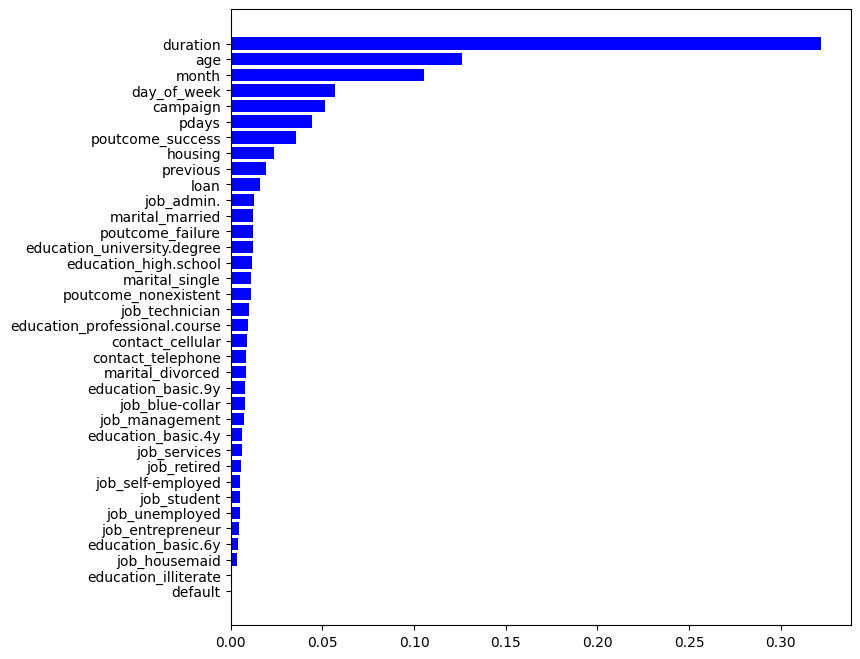

In [933]:
# instantiate RF classifier used to identify feature ranking
rf_for_feature_selection = RandomForestClassifier(random_state=40)
rf_for_feature_selection.fit(X_train, y_train)

# grab feeature importances
feature_importances = rf_for_feature_selection.feature_importances_
indices = np.argsort(feature_importances)

# plot feature importances for visualization
plt.figure(figsize=(8, 8))
plt.barh(range(X_train.shape[1]), feature_importances[indices],
        color="b", align="center")
plt.yticks(range(X_train.shape[1]), [df.drop('y', axis=1).columns[i] for i in indices])
plt.show()

### **Features selection and Correlation Matrix**

When looking at the correlation matrix, I see some key features and notable interactions between features.

**Key Features:**
* *duration*
* *pdays*
* *poutcome_success*

**Collinearity Concerns:**
* *contact_cellular* and *contact_telephone*
* *pdays* and *poutcome_success*
* *poutcome_failure*, *poutcome_nonexistent*, and *poutcome_success*

I am removing *poutcome_failure*, *poutcome_nonexistent*, and *poutcome_success* and keeping *pdays* to address collinearity concerns. I also attempted various configurations of leaving some of these in, and this had the best performance in the metrics I am focusing on.

*default* ranks low in feature importance and has near 0 correlation with target.

From the education demographic, the one with the strongest correlation to the target is *education_university.degree* and that also ranks high as a feature. I'll try removing the others to address collinearity and multicollinearity.

*marital_married* has the highest impact and removing *marital_divorced* and *marital_single* should help address collinearity.

In [ ]:
# set a baseline GradientBoostingClassifier for comparison without removing features
gbst_before = GradientBoostingClassifier(random_state=40)
gbst_before.fit(X_train, y_train)
default_model_eval.eval(gbst_before)

# copy df to ensure we don't change the df accidentally when evaluating
df_duplicate = df.copy()

features_to_drop = [
    'contact_telephone', 
    'poutcome_success', 
    'poutcome_failure', 
    'poutcome_nonexistent', 
    'default', 
    'education_high.school',
    'education_professional.course',
    'education_basic.9y',
    'education_basic.4y',
    'education_basic.6y',
    'education_illiterate',
    'marital_divorced',
    'marital_single'
]

# drop features and set new df_after
df_after = df_duplicate.drop(features_to_drop, axis=1)
X_after = df_after.drop('y', axis=1)
y_after = df_after['y']

# generate training and testing subsets
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(X_after, y_after, test_size=0.2, random_state=40)

# fit & evaluate GradientBoostingClassifier on training data sans dropped features
gbst_after = GradientBoostingClassifier(random_state=40)
gbst_after.fit(X_train_after, y_train_after)
gbst_after_model_eval = Model_Evaluator(X_after, y_after, X_train_after, X_test_after, y_train_after, y_test_after)
gbst_after_model_eval.eval(gbst_after)


### **Exploring Feature Selection with RFECV**

I took a look at automating feature selection using RFECV. Using this method, I improved my CV mean-accuracy by a small amount but reduced my AUC and accuracy. While this made the model very slightly more robust, this led to a reduction in correctly predicted true values and an increase in correctly predicted false values. We are looking to optimize our model to correctly predict as many true values as possible so we can ensure that we are targeting the most people that may say yes with our campaign.

Additionally, I chose models that can naturally address some collinearity (ie. random feature sampling in Random Forest and weak learners in AdaBoost).

In [1025]:
from sklearn.feature_selection import RFECV

selector = RFECV(RandomForestClassifier(random_state=40), step=1, cv=3)
selector = selector.fit(X, y)

# using RFECV transform X to narrow down to selected features
X_selected = selector.transform(X)

# split into test and train sets using selected features
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y, test_size=0.2, random_state=40)

CV Mean-Accuracy: 0.779
Accuracy:  0.8993112495900295
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      5326
        True       0.67      0.40      0.50       772

    accuracy                           0.90      6098
   macro avg       0.79      0.69      0.72      6098
weighted avg       0.89      0.90      0.89      6098

AUC: 0.911801087246259


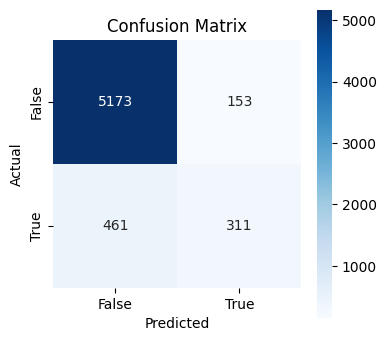

CV Mean-Accuracy: 0.873
Accuracy:  0.8750409970482125
              precision    recall  f1-score   support

       False       0.89      0.97      0.93      5326
        True       0.52      0.19      0.28       772

    accuracy                           0.88      6098
   macro avg       0.71      0.58      0.60      6098
weighted avg       0.84      0.88      0.85      6098

AUC: 0.7613628956784491


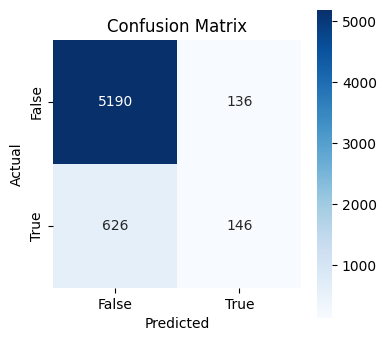

In [1026]:
# train & eval. w/ full features
rf_full = RandomForestClassifier(random_state=40)
rf_full.fit(X_train, y_train)
eval_model(rf_full)

# train & eval. w/ selected features
rf_s = RandomForestClassifier(random_state=40)
rf_s.fit(X_train_s, y_train_s)
eval_model(rf_s, X_selected, y, X_train_s, X_test_s, y_train_s, y_test_s)

### **Replacing data with data from manual feature selection**

In [1027]:
# replace our sets with _after sets that I made through manual feature selection
X, y, X_train, X_test, y_train, y_test = X_after, y_after, X_train_after, X_test_after, y_train_after, y_test_after
default_model_eval.reset(X, y, X_train, X_test, y_train, y_test)

### **Visualizing ranking of remaining features**

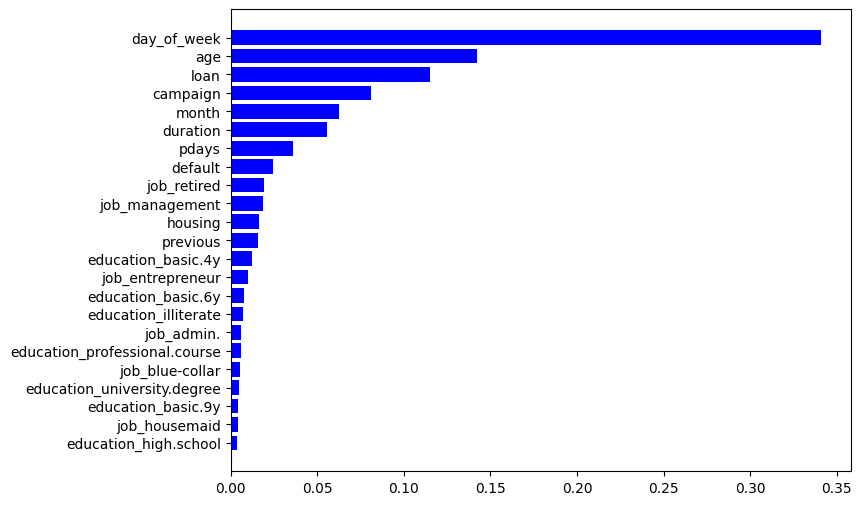

In [939]:
# RF classifier for fitting on our remaining features after selection
rf_after_feature_selection = RandomForestClassifier(random_state=40)
rf_after_feature_selection.fit(X_train, y_train)

# pull ranked features
feature_importances = rf_after_feature_selection.feature_importances_
indices = np.argsort(feature_importances)

#plot the ranked features
plt.figure(figsize=(8, 6))
plt.barh(range(X_train.shape[1]), feature_importances[indices],
        color="b", align="center")
plt.yticks(range(X_train.shape[1]), [df.drop('y', axis=1).columns[i] for i in indices])
plt.show()

## **Addressing Imbalance**


#### 1. Let's set a baseline with no oversampling or undersampling.

Baseline dataset shape Counter({False: 21303, True: 3087})
CV Mean-Accuracy: 0.835
Accuracy:  0.8963594621187274
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      5326
        True       0.65      0.40      0.50       772

    accuracy                           0.90      6098
   macro avg       0.78      0.68      0.72      6098
weighted avg       0.88      0.90      0.89      6098

AUC: 0.9122116258300759


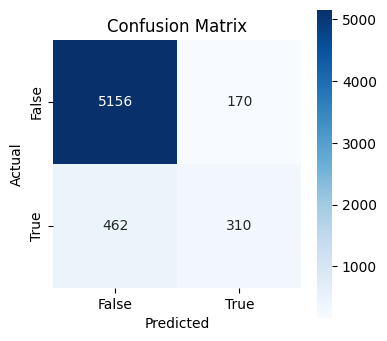

In [820]:
# import Counter to help understand the shape of our data
from collections import Counter

# print the shape of our training targets
print('Baseline dataset shape %s' % Counter(y_train))

# train using data that is unmodified (neither oversampled nor undersampled)
rf_baseline = RandomForestClassifier(random_state=40)
rf_baseline.fit(X_train, y_train)

# evaluate model trained on unmodified data
default_model_eval.eval(rf_baseline)

#### 2. How does oversampling perform?

Oversampled dataset shape Counter({False: 21308, True: 21298})
CV Mean-Accuracy: 0.835
Accuracy:  0.9763857002295835
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      5326
        True       0.90      0.92      0.91       772

    accuracy                           0.98      6098
   macro avg       0.94      0.95      0.95      6098
weighted avg       0.98      0.98      0.98      6098

AUC: 0.9918365326806223


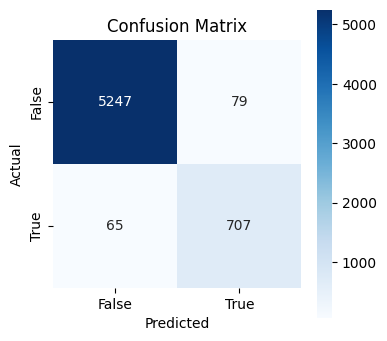

In [821]:
# we will use SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# instantiate smote and fit
sm = SMOTE(random_state=40)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

# create train and test sets using oversampled data
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=40)

print('Oversampled dataset shape %s' % Counter(y_train_res))

# evaluate model trained on oversampled data
rf_oversampled = RandomForestClassifier(random_state=40)
rf_oversampled.fit(X_train_oversampled, y_train_oversampled)
default_model_eval.eval(rf_oversampled)

#### 3. How does undersampling perform?


Undersampled dataset shape Counter({False: 21308, True: 21298})
CV Mean-Accuracy: 0.835
Accuracy:  0.8632338471630042
              precision    recall  f1-score   support

       False       1.00      0.85      0.92      5326
        True       0.48      0.97      0.64       772

    accuracy                           0.86      6098
   macro avg       0.74      0.91      0.78      6098
weighted avg       0.93      0.86      0.88      6098

AUC: 0.9699985796532409


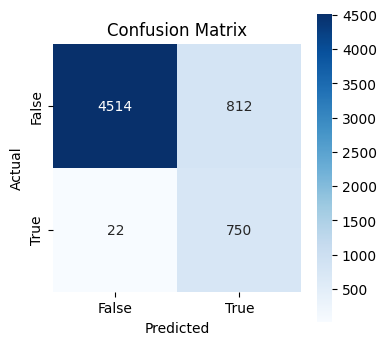

In [822]:
# using RandomUnderSampler for undersampling
from imblearn.under_sampling import RandomUnderSampler

# instantiate RandomUnderSampler and fit
rus = RandomUnderSampler(random_state=40)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# create train and test sets using undersampled data
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=40)

print('Undersampled dataset shape %s' % Counter(y_train_res))

# evaluate model trained on undersampled data
rf_undersampled = RandomForestClassifier(random_state=40)
rf_undersampled.fit(X_train_undersampled, y_train_undersampled)
default_model_eval.eval(rf_undersampled)

#### 4. Discussion on Oversampling & undersampling

In this case, I've found that after oversampling, training the model on the oversampled data, and then evaluating the model on the non-resampled data the model performs very well. From here out, I'll use the oversampled data for training and non-resampled data for evaluation.  This way I ensure that I am working with a balanced dataset for training but testing the model in a realistic scenario with imbalanced data.

# **Models**

I'll consider 3 models for this problem and tune hyperparameters and take a look at feature selection for some of them
1. Random Forest
2. Gradient Boosting
3. AdaBoost

## **Random Forest**

Random Forest performed well even before tuning hyperparameters when trained on oversampled data.

#### 1. How does Random Forest perform when training on unmodified data without addressing imbalance?
   * I found it struggled to properly classify True outcomes as True with a recall value of 0.40
   * As one would expect with a heavy imbalance in the data, the model performed well in classifying False as False and had a skewed accuracy and AUC because of it.
   * This is why it is important not only to look at how the model performs on both classes through AUC and accuracy, but also to look at the precision, recall, and f1-score for the minority class.

CV Mean-Accuracy: 0.835
Accuracy:  0.8963594621187274
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      5326
        True       0.65      0.40      0.50       772

    accuracy                           0.90      6098
   macro avg       0.78      0.68      0.72      6098
weighted avg       0.88      0.90      0.89      6098

AUC: 0.9122116258300759


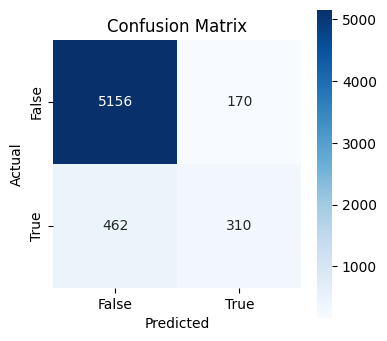

In [824]:
# training on unmofified data for comparison
rf_before = RandomForestClassifier(random_state=40)
rf_before.fit(X_train, y_train)
default_model_eval.eval(rf_before)

#### 2. How does Random Forest perform on unmodified test data after addressing imbalance by training on oversampled data?
   * This model performs very well. There is an **increase** in the models ability to correctly classify `False` samples as `False` as well as a substantial improvement in the model's ability to classify `True` samples as `True`. Although it performs slightly worse in classifying the minority class than the majority class (which can be expected with imbalanced data), training on oversampled data very much helped here.
   * Our AUC increases from `0.9122` to `0.9918`
   * The *precision*, *recall*, and *f1-score* **increase** for both `True` and `False` classes.

CV Mean-Accuracy: 0.835
Accuracy:  0.9763857002295835
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      5326
        True       0.90      0.92      0.91       772

    accuracy                           0.98      6098
   macro avg       0.94      0.95      0.95      6098
weighted avg       0.98      0.98      0.98      6098

AUC: 0.9918365326806223


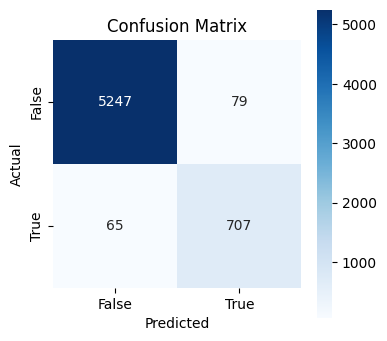

In [1028]:
# training on oversampled data
rf = RandomForestClassifier(random_state=40)
rf.fit(X_train_oversampled, y_train_oversampled)
default_model_eval.eval(rf)

### **Hyperparameter Tuning with Random Forest Classifier**

After tuning the hyperparameters and attempting to improve CV mean-accuracy, I achieved a very small improvement with a more substantial degradation in performance in AUC, accuracy, precision, recall, and f1-score. I believe that the following parameters achieve strong performance while having a good cross-validation mean-accuracy where our model is robust and will handle new data well.
| Parameter | Value | Notes (if applicable) | 
| :--- | :--- | :--- |
| n_estimators | 100 |  |
| max_depth | None | I think that because of the number of samples and features we have, we need our trees to be able to grow deep to capture the complexity of our data. This model does this without too much overfitting, as seen by the cross-validation mean-accuracy. |
| min_samples_split | 2 ||
| min_samples_leaf | 1 ||

In [887]:
# set the scoring metrics to use in CV
scoring = {
    'AUC': 'roc_auc',
    'Accuracy': 'accuracy'
}

# params to test combination of
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [1, 2]
}

# run grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=40,n_jobs=-1), params, cv=10, refit='AUC', scoring=scoring, error_score="raise", verbose=2)

In [888]:
grid_rf.fit(X_train_oversampled, y_train_oversampled)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END m

GridSearchCV(cv=10, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=40),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             refit='AUC', scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy'},
             verbose=2)

CV Mean-Accuracy: 0.836
Accuracy:  0.9680223023942276
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      5326
        True       0.88      0.87      0.87       772

    accuracy                           0.97      6098
   macro avg       0.93      0.93      0.93      6098
weighted avg       0.97      0.97      0.97      6098

AUC: 0.9881630879116817


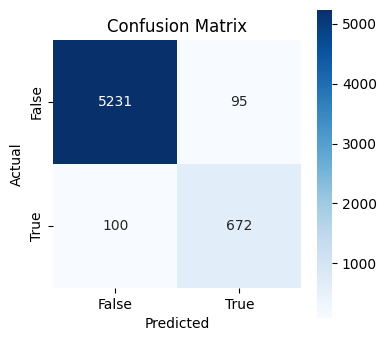

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 40, 'verbose': 0, 'warm_start': False}


In [889]:
# eval best estimator and print params for it
default_model_eval.eval(grid_rf.best_estimator_)
print(grid_rf.best_estimator_.get_params())

## **Gradient Boosting**

I took a look at Gradient Boosting as a model for this data set and found that it performed poorly on the unmodified data as well as the oversampled data. After tuning the hyperparameters, I was only able to achieve a negligible improvement in performance.

CV Mean-Accuracy: 0.836
Accuracy:  0.902918989832732
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      5326
        True       0.68      0.44      0.53       772

    accuracy                           0.90      6098
   macro avg       0.80      0.71      0.74      6098
weighted avg       0.89      0.90      0.89      6098

AUC: 0.9217466762912996


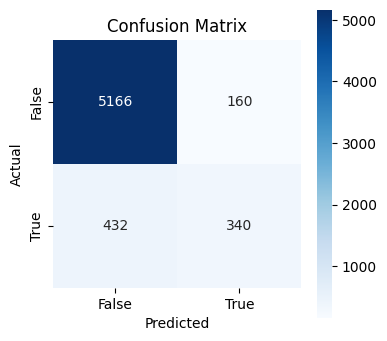

In [900]:
# using unmodified training data
simple_bst = GradientBoostingClassifier(random_state=40)
simple_bst.fit(X_train, y_train)
default_model_eval.eval(simple_bst)

CV Mean-Accuracy: 0.836
Accuracy:  0.8755329616267629
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      5326
        True       0.51      0.68      0.58       772

    accuracy                           0.88      6098
   macro avg       0.73      0.79      0.75      6098
weighted avg       0.89      0.88      0.88      6098

AUC: 0.8961778809204626


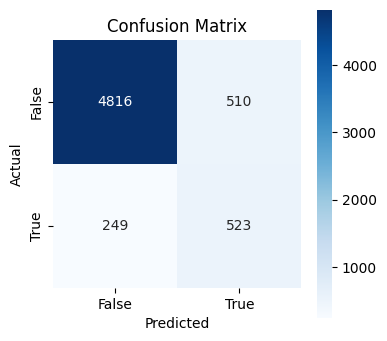

In [901]:
# using oversampled training data
simple_bst = GradientBoostingClassifier(random_state=40)
simple_bst.fit(X_train_oversampled, y_train_oversampled)
default_model_eval.eval(simple_bst)

#### **Hyperparameter Tuning with GradientBoostingClassifier**

I was able to achieve some good gains in performance in exchange for a small loss in cross validation mean accuracy.

In [906]:
# params to test combination of
params = {
    'n_estimators': [100, 250],
    'learning_rate': [0.1, 0.9, 1.0],
    'max_depth': [None, 5, 15]
}

# run grid search
grid_gbst = GridSearchCV(GradientBoostingClassifier(random_state=40, max_features='sqrt'), params, cv=10, error_score="raise", scoring='roc_auc', verbose=2)

In [907]:
grid_gbst.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.7s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.3s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.6s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.3s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.7s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.5s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.3s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.4s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.4s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  10.6s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=250; total time=  18.8s
[CV] END learning_rate=0.1, max_depth=None, n_

GridSearchCV(cv=10, error_score='raise',
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=40),
             param_grid={'learning_rate': [0.1, 0.9, 1.0],
                         'max_depth': [None, 5, 15],
                         'n_estimators': [100, 250]},
             scoring='roc_auc', verbose=2)

CV Mean-Accuracy: 0.822
Accuracy:  0.9032469662184323
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      5326
        True       0.67      0.46      0.55       772

    accuracy                           0.90      6098
   macro avg       0.80      0.71      0.75      6098
weighted avg       0.89      0.90      0.90      6098

AUC: 0.9251477257913568


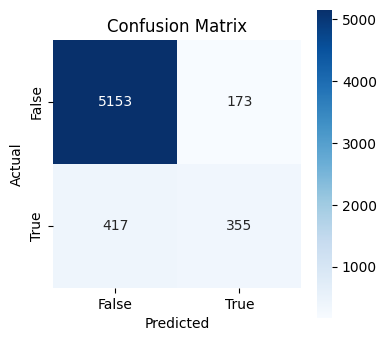

In [908]:
# evaluate best estimator
default_model_eval.eval(grid_gbst.best_estimator_)

## **AdaBoost Classifier**

AdaBoost proved to be more robust than Random Forest and Gradient Boosting with better cross-validation mean-accuracy scores out of the box. With tuning its hyperparameters, the cross-validation mean-accuracy decreased a bit. I was still unable to match Random Forest's performance in AUC, accuracy, precision, recall, and f1-score.

In [909]:
# instantiate basic adaboost classifier
adabst = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),    
    random_state=40, algorithm='SAMME')

In [910]:
adabst.fit(X_train_oversampled, y_train_oversampled)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=40)

CV Mean-Accuracy: 0.862
Accuracy:  0.8133814365365694
              precision    recall  f1-score   support

       False       0.95      0.83      0.89      5326
        True       0.37      0.69      0.48       772

    accuracy                           0.81      6098
   macro avg       0.66      0.76      0.68      6098
weighted avg       0.88      0.81      0.84      6098

AUC: 0.8596893186032348


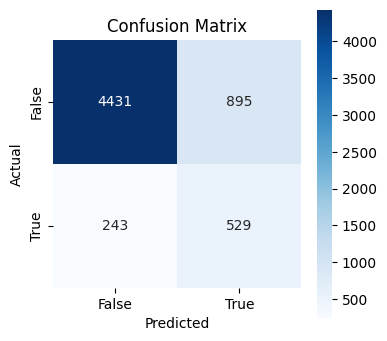

In [911]:
default_model_eval.eval(adabst)

#### **Hyperparameter Tuning with AdaBoost Classifier**

I was able to achieve substantial gains with AdaBoost as well through hyperparameter tuning. I saw only a small decrease in robustness.

In [912]:
params = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [ 0.1, 0.9, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)]
    
}

grid_adaboost = GridSearchCV(AdaBoostClassifier(   
    random_state=40, algorithm='SAMME'), params, cv=10, error_score="raise", verbose=2)

In [913]:
grid_adaboost.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.4s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.3s
[CV] END estimator=DecisionTreeClassifier(max_dep

GridSearchCV(cv=10, error_score='raise',
             estimator=AdaBoostClassifier(algorithm='SAMME', random_state=40),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(max_depth=5),
                                       DecisionTreeClassifier(max_depth=10)],
                         'learning_rate': [0.1, 0.9, 1.0],
                         'n_estimators': [50, 100, 200, 400]},
             verbose=2)

CV Mean-Accuracy: 0.839
Accuracy:  0.9017710724827812
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      5326
        True       0.68      0.42      0.52       772

    accuracy                           0.90      6098
   macro avg       0.80      0.69      0.73      6098
weighted avg       0.89      0.90      0.89      6098

AUC: 0.914655278923027


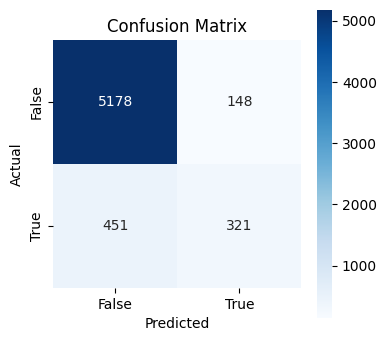

In [914]:
default_model_eval.eval(grid_adaboost.best_estimator_)

# **Results & Analysis**

Below, I analyze the results of the models and their performance. I found Random Forest to handle this data set the best, particularly with respect to the positive class. Random Forest is my model of choice.

### Evaluation metrics
I chose to focus on the following metrics:
1. AUC
   * This is the main metric I focused on improving. I use this metric to understand the true positive rate vs. the false positive rate, and it is better than focusing just on accuracy alone when dealing with imbalanced data.
2. Precision, Recall, and F1-score for the minority class (true)
   * It was important to focus on these specific metrics to ensure that our model was handling the imbalanced data and performing well with the minority class.
4. Cross-Validation Mean-Accuracy
   * Ensure that the model can properly handle unseen data
5. Accuracy
   * Provides a metric for how our model handles both classes of data and is easy to interpret, but this metric has to be viewed with caution due to the imbalanced dataset.
  





### Training and evaluation process
1. After EDA and cleaning, I worked through the feature engineering process.
   * I ranked the features and looked at the correlation matrix. I identified and dropped features based on high correlation to other features and low impact on the target.
3. Then, I focused on addressing the imbalance in the dataset by exploring oversampling and undersampling. When evaluating these methods, I found that oversampling really helped the models train and perform better when evaluating with unmodified data.
4. After deciding to move forward with training on oversampled data and evaluating on unmodified data, I sought to compare Random Forest, Gradient Boosting, and AdaBoost.
5. I then tuned the hyperparameters for each model using GridSearchCV and compared the performance of the models.
   * Random Forest outperformed the other models

### Comparing Results: Random Forest, Gradient Boosting, and AdaBoost
After training on oversampled data to address imbalance, tuning hyperparameters, and evaluating the model on unmodified data, the models performed as follows with RandomForest performing the best:

| Model | AUC | Accuracy | CV Mean-Acc. | Precision (True) | Recall (True) | F1-score (True) |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Random Forest | 0.9918 | 0.9764 | 0.835 | 0.90 | 0.92 | 0.91 |
| Gradient Boosting | 0.9251 | 0.9032 | 0.822 | 0.67 | 0.46 | 0.55 |
| AdaBoost | 0.9147 | 0.9018 | 0.839 | 0.68 | 0.42 | 0.52 |

    


Gradient Boosting and AdaBoost both responded really well to hyperparameter tuning. I struggled to improve Random Forest with hyperparameter tuning. Whenever I made gains in cross-validation mean-accuracy, the losses in AUC and minority class performance outweighed the gains, in my opinion. This could be because it did very well with default parameters due to the complexity of the data. 

Bootstrapping and feature randomness made it the most capable model for handling complex imbalanced data.

### Plotting the ROC Curve

In [1046]:
# best performing models for each classifier
models = {
    'RanfomForest': rf,
    'GradientBoosting': grid_gbst.best_estimator_,
    'AdaBoost': grid_adaboost.best_estimator_
}

# dict for curve results
results = {}

for name, model in models.items():
    # predict probabilities with test set
    scores = model.predict_proba(X_test)[:,1]
    
    # get ROC metrics
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)

    # get precision recall metrics 
    precision, recall, _ = precision_recall_curve(y_test, scores)
    pr_auc = average_precision_score(y_test, scores)

    # store metrics
    results[name] = (fpr, tpr, roc_auc, precision, recall, pr_auc)
    

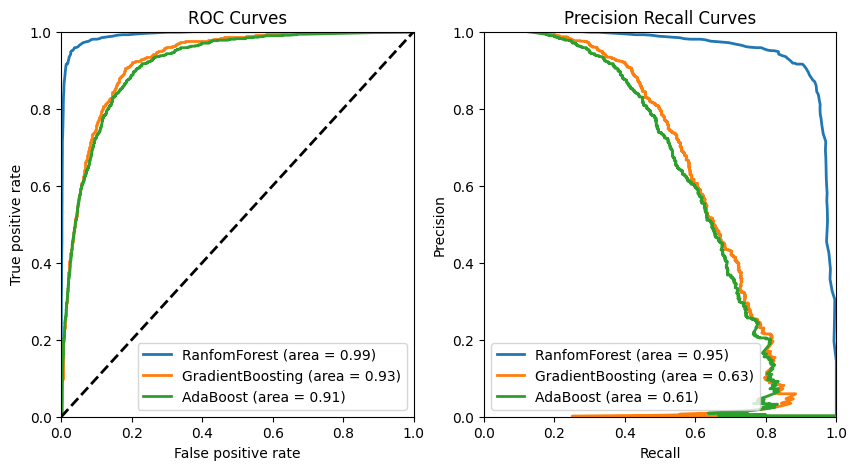

In [1052]:
# plot the roc auc
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)

# plot curve for each model
for name, (fpr, tpr, roc_auc, precision, recall, pr_auc) in results.items():
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})', linewidth=2)

# random chance line splitting plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('ROC Curves')

plt.subplot(1, 2, 2)

for name, (fpr, tpr, roc_auc, precision, recall, pr_auc) in results.items():
    plt.plot(precision, recall, label=f'{name} (area = {pr_auc:.2f})', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision Recall Curves')

plt.show()






Visualizing the ROC and Precision-Recall curves of the models overlayed on one another helps see how much better the Random Forest model is performing with this dataset. In the Precision-Recall plot, I can see how much better Random Forest is handling the true class in the dataset.

# **Conclusion**

### Key Takeaways
I learned a great deal about working with imbalanced data throughout this project. There were times where I considered going back to the drawing board and looking for a different dataset to work with. However, I am glad that I kept working with this dataset. I was able to practice a lot more with feature engineering, oversampling, and undersampling while focusing on metrics that were more complex to interpret than just accuracy.

### Struggles
My biggest struggle was working with imbalanced data. I had to research oversampling and undersampling to better understand how to address this issue and improve performance in my models. Additionally, it was tough to find the right balance of performance on the metrics of cross-validation mean-accuracy and AUC.

### How to improve
I could improve my hyperparameter tuning to find a better balance in my metrics of AUC, accuracy, and cross-validation mean-accuracy. By doing this I could make my Random Forest model more robust in handling unseen data while continuing to be strong in handling imbalanced data.